# Step 1: Overview And Dataset Selection

Student Performance (Multiple Linear Regression)

About Dataset

Description:

The Student Performance Dataset is a dataset designed to examine the factors influencing academic student performance. The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.

Variables:

Hours Studied: The total number of hours spent studying by each student.

Previous Scores: The scores obtained by students in previous tests.

Extracurricular Activities: Whether the student participates in extracurricular activities (Yes or No).

Sleep Hours: The average number of hours of sleep the student had per day.

Sample Question Papers Practiced: The number of sample question papers the student practiced.

Target Variable:

Performance Index: A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.

The dataset aims to provide insights into the relationship between the predictor variables and the performance index. Researchers and data analysts can use this dataset to explore the impact of studying hours, previous scores, extracurricular activities, sleep hours, and sample question papers on student performance.

P.S: Please note that this dataset is synthetic and created for illustrative purposes. The relationships between the variables and the performance index may not reflect real-world scenarios

License:

Anyone is free to share and use the data

# Step 2: Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Step 3: Load the dataset

In [3]:
df = pd.read_csv('./data/students_performance/students_performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


# Step 4: Exploratory Data Analysis

In [4]:
df.shape

(10000, 6)

In [5]:
df.size

60000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [7]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [8]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

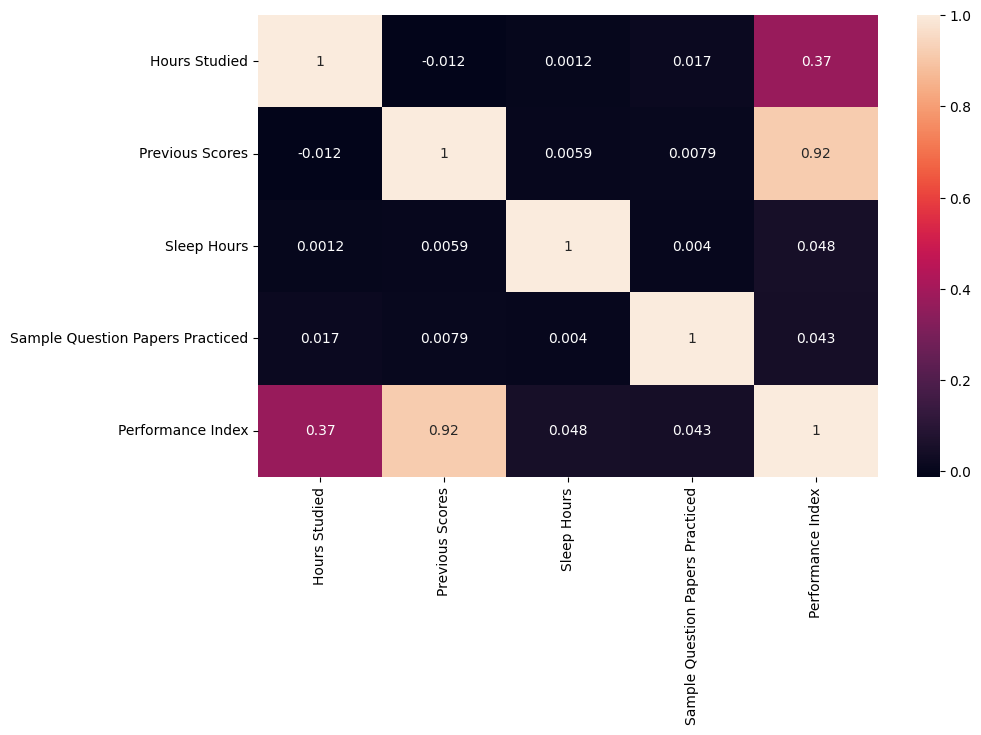

In [13]:
corr_matrix = df.corr(numeric_only = True)

plt.figure(figsize = (10, 6))
sns.heatmap(corr_matrix, annot = True)
plt.show()

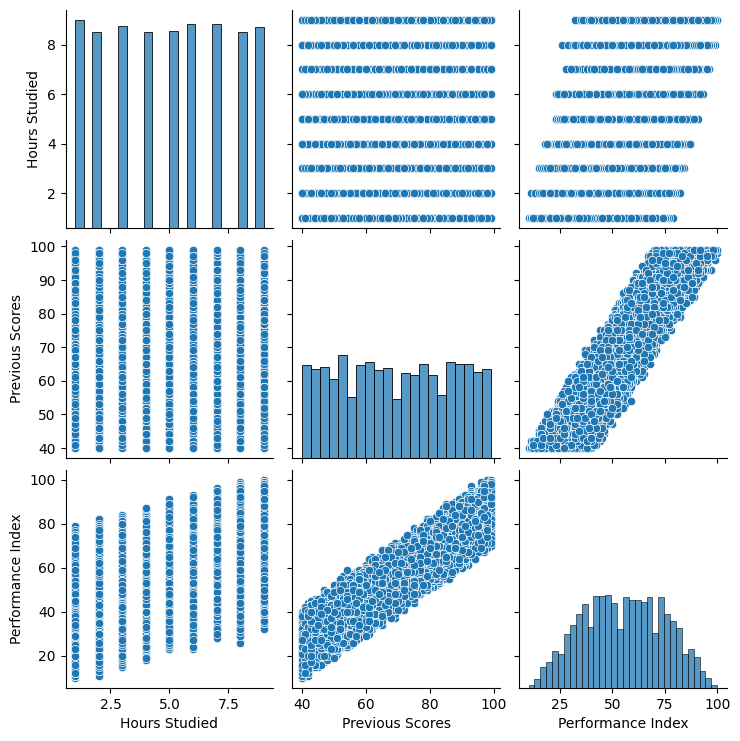

In [15]:
sns.pairplot(
    df,
    x_vars = ['Hours Studied', 'Previous Scores', 'Performance Index'],
    y_vars = ['Hours Studied', 'Previous Scores', 'Performance Index'],
)

# Step 5: Feature Engineering

In [16]:
selected_features = ['Hours Studied', 'Previous Scores']

In [18]:
# check null values
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

# Step 6: Split The Data

In [21]:
X = df[selected_features]
y = df['Performance Index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"\n Training set shape: {X_train.shape}")
print(f"\n Testing set shape: {X_test.shape}")


 Training set shape: (8000, 2)

 Testing set shape: (2000, 2)


# Step 7: Train the Model

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

# Step 8: Make Predictions

In [27]:
y_pred = model.predict(X_test)

predictions = pd.DataFrame({
    'Actual': y_test,
    'Predictions': y_pred,
})

print(predictions)

for feature, coef in zip(selected_features, model.coef_):
    print(f"\n Feature {feature} has coefficient: {coef:.4f}")
print(f"\n Intercept has value: {model.intercept_:.4f}")

      Actual  Predictions
6252    51.0    54.819150
4684    20.0    22.845140
1731    46.0    47.309629
4742    28.0    30.208273
4521    41.0    44.257514
...      ...          ...
6412    45.0    47.262058
8285    66.0    62.134711
7853    16.0    16.740911
1095    65.0    63.346042
6929    47.0    45.662806

[2000 rows x 2 columns]

 Feature Hours Studied has coefficient: 2.8582

 Feature Previous Scores has coefficient: 1.0174

 Intercept has value: -29.6703


# Step 9: Evaluate the Model

In [28]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print(f"\n Mean squared error: {mse:.4f}")
print(f"\n R squared score: {r2:.4f}")



 Mean squared error: 5.2419

 R squared score: 0.9859


c:\Users\imiha\OneDrive\Desktop\Udemy\ML\Master the theory, practice,and math behind ML\python-exercise\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


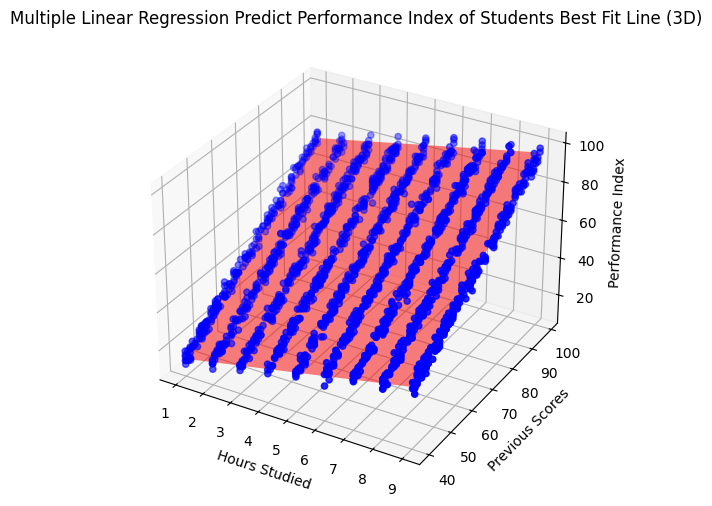


 Mean squared error: 5.2419

 R squared score: 0.9859


In [35]:
# Visualizing Best Fit Line in 3D
fig = plt.figure(figsize = (12, 6))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(X_test['Hours Studied'], X_test['Previous Scores'], y_test, color = 'blue', label = 'Actual Data')
x1_range = np.linspace(X_test['Hours Studied'].min(), X_test['Hours Studied'].max(), 100)
x2_range = np.linspace(X_test['Previous Scores'].min(), X_test['Previous Scores'].max(), 100)

x1, x2 = np.meshgrid(x1_range, x2_range)

z = model.predict(np.c_[x1.ravel(), x2.ravel()]).reshape(x1.shape)

ax.plot_surface(x1, x2, z, color = 'red', alpha = 0.5, rstride = 100, cstride = 100)
ax.set_xlabel('Hours Studied')
ax.set_ylabel('Previous Scores')
ax.set_zlabel('Performance Index')

ax.set_title('Multiple Linear Regression Predict Performance Index of Students Best Fit Line (3D)')
plt.show()

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print(f"\n Mean squared error: {mse:.4f}")
print(f"\n R squared score: {r2:.4f}")